## Library loading

In [2]:
import tensorflow as tf
import tensorflow.contrib.image.ops
from PIL import Image
import numpy as np
import glob

from modeling import *
from dataprovider import *
from make_tfrecords import *
from layer import *


## Make Tfrecords for train / test sets

In [3]:
# 실행
tfroecord_sample = TFrecord_Create_For_Unet(train_test = 'train',
                        img_folder = '/notebooks/Unet_membrane/unet/data/membrane/train/new_data/',
                        img_type = 'png',
                        label_name = 'labels',
                        tf_record_pre_fix = 'membrane_train',
                        nx = 512,
                        ny = 512
                       )

tfrecord = TFrecord_Create_For_Unet(train_test = 'test',
                        img_folder = '/notebooks/Unet_membrane/unet/data/membrane/test2/',
                        img_type = 'png',
                        label_name = 'labels',
                        tf_record_pre_fix = 'membrane_test',
                        nx = 512,
                        ny = 512
                       )
                       

original images:  28
ground truth images:  28
Tfrecord generation finished
original images:  2
ground truth images:  2
Tfrecord generation finished


## Set up Dataprovider

In [5]:
import tensorflow as tf
import tensorflow.contrib.image.ops
from PIL import Image
import numpy as np
import glob

from modeling import *
from dataprovider import *
from make_tfrecords import *
from layer import *

data_provider = Tfrecord_ImageDataProvider(                 
                                        train_tfrecord_path = '/notebooks/Unet/unet_tfrecord/membrane_train_train.tfrecords', 
#                                         test_tfrecord_path = '/notebooks/Unet/unet_tfrecord/tfrecords_test.tfrecords', 
                                        test_tfrecord_path = '/notebooks/Unet/unet_tfrecord/membrane_test_test.tfrecords', 
                                        channels = 1, train_batch_size = 4, test_batch_size = 1, 
                                        nx = 512, ny = 512, n_imgs = 30)
                                     

## Training

In [14]:
from modeling import *
from dataprovider import *
from make_tfrecords import *
from layer import *

net = Unet(cost = "dice_coefficient", layers=5, features_root=64, channels=1) 
trainer = Trainer(net, data_provider = data_provider, batch_size=4, validation_batch_size = 1,optimizer="adam", lr = 0.0001, opt_kwargs={})
path = trainer.train(output_path='/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2/', prediction_path = '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2/', training_iters=8, epochs=100)


2019-03-22 06:22:04,332 Layers 5, features 64, filter size 3x3, pool size: 2x2
2019-03-22 06:22:07,501 Removing '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2'
2019-03-22 06:22:07,578 Removing '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2'
2019-03-22 06:22:09,644 Allocating '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2'
2019-03-22 06:22:12,278 Validation loss=0.3511
2019-03-22 06:22:12,379 Start optimization
2019-03-22 06:22:15,238 Iter 1, Minibatch Loss= 0.3554
2019-03-22 06:22:16,171 Iter 2, Minibatch Loss= 0.3379
2019-03-22 06:22:17,098 Iter 3, Minibatch Loss= 0.3339
2019-03-22 06:22:18,028 Iter 4, Minibatch Loss= 0.3325
2019-03-22 06:22:18,950 Iter 5, Minibatch Loss= 0.3322
2019-03-22 06:22:19,878 Iter 6, Minibatch Loss= 0.3233
2019-03-22 06:22:20,805 Iter 7, Minibatch Loss= 0.3283
2019-03-22 06:22:21,738 Iter 8, Minibatch Loss= 0.3195
2019-03-22 06:22:21,739 Epoch 0, Average loss: 0.3387, learning rate: 0.0001
2019

## Model output with Dice loss

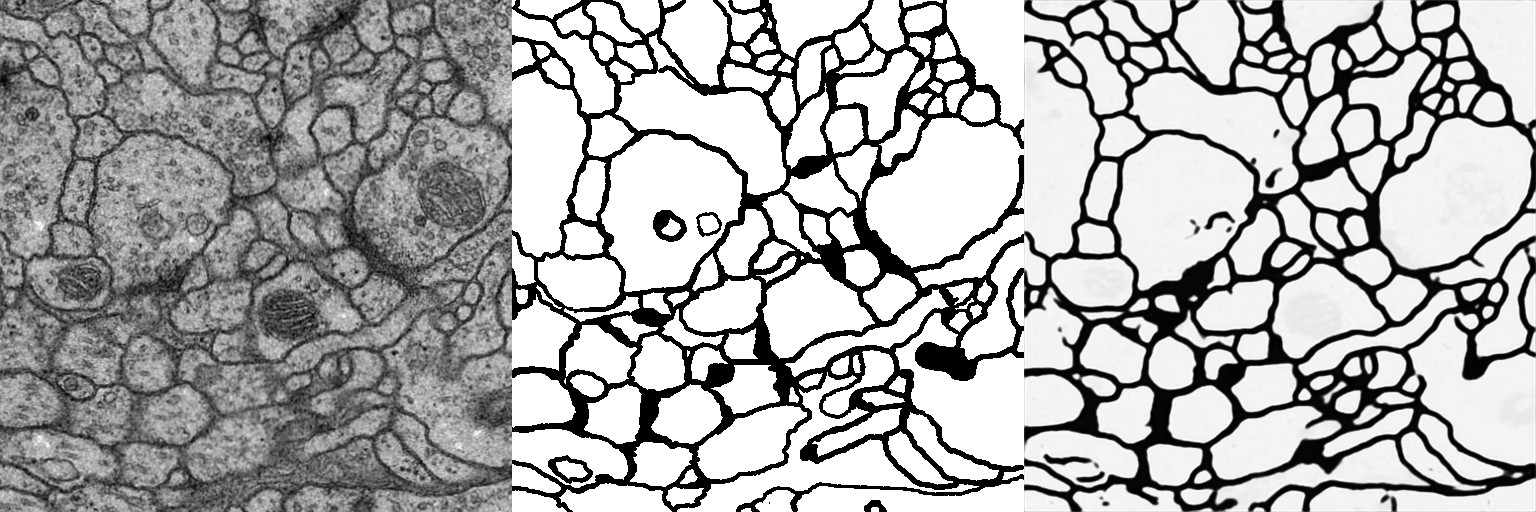

In [7]:
output = Image.open('/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2/epoch_98.jpg')
output